<a href="https://colab.research.google.com/github/dantunesc/Chess-in-cpp/blob/main/C%C3%B3pia_de_RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#importando dados como Dataframe

df = pd.read_excel('SCORE_FRAUDE_TREINO.xlsx')
df.head(3)


,RESULTADO,UF,CIDADE,CLASSIFICACAO_SCRIPT,TEMPO_FIM_VIGENCIA,TEMPO_INICIO_VIGENCIA,MONTADORA_VEICULO,VEICULO,FAMILIA_VEICULO,VALOR_FRANQUIA,QNT_ATENDIMENTO_BASE
0,APROVADO,BA,SALVADOR,LANTERNA,1296,531,GENERAL MOTORS,ASTRA HATCH FLEXPOWER ADVANTAGE 2.0,ASTRA,115.0,0
1,APROVADO,SP,SAO PAULO,PARABRISA,1034,427,TOYOTA,ETIOS SEDAN XLS 1.5 16V(FLEX) A/G 4P,ETIOS,230.0,0
2,APROVADO,PR,MARINGA,FAROL,80,651,FIAT,STRADA FIRE(C.SIM) 1.4 8V FLEX 2P A/G,STRADA,65.0,0


In [ ]:
df.describe()

,TEMPO_FIM_VIGENCIA,TEMPO_INICIO_VIGENCIA,VALOR_FRANQUIA,QNT_ATENDIMENTO_BASE
count,979.000000,979.000000,979.000000,979.000000
mean,187.719101,355.926456,191.647283,2.712972
std,196.146652,229.260402,257.017376,40.640732
min,0.000000,0.000000,0.000000,0.000000
25%,17.500000,178.500000,90.000000,0.000000
50%,155.000000,364.000000,130.000000,0.000000
75%,285.500000,469.000000,210.000000,2.000000
max,1296.000000,1458.000000,2369.110000,1270.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RESULTADO              979 non-null    object 
 1   UF                     979 non-null    object 
 2   CIDADE                 979 non-null    object 
 3   CLASSIFICACAO_SCRIPT   979 non-null    object 
 4   TEMPO_FIM_VIGENCIA     979 non-null    int64  
 5   TEMPO_INICIO_VIGENCIA  979 non-null    int64  
 6   MONTADORA_VEICULO      979 non-null    object 
 7   VEICULO                979 non-null    object 
 8   FAMILIA_VEICULO        979 non-null    object 
 9   VALOR_FRANQUIA         979 non-null    float64
 10  QNT_ATENDIMENTO_BASE   979 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 84.3+ KB


In [ ]:
# Excluíndo colunas de código

df = df.drop(columns=['VEICULO','FAMILIA_VEICULO'])

In [ ]:
import numpy as np

# Convertendo RESULTADO em binário

df['RESULTADO'] = np.where(df['RESULTADO'].isin(['APROVADO']), 0, 1)

# Converter colunas em categorical

df['UF'] = pd.Categorical(df['UF'])
df['CIDADE'] = pd.Categorical(df['CIDADE'])
df['CLASSIFICACAO_SCRIPT'] = pd.Categorical(df['CLASSIFICACAO_SCRIPT'])
df['MONTADORA_VEICULO'] = pd.Categorical(df['MONTADORA_VEICULO'])

# Converter colunas em numeric
df['TEMPO_FIM_VIGENCIA'] = pd.to_numeric(df['TEMPO_FIM_VIGENCIA'])
df['TEMPO_INICIO_VIGENCIA'] = pd.to_numeric(df['TEMPO_INICIO_VIGENCIA'])
df['QNT_ATENDIMENTO_BASE'] = pd.to_numeric(df['QNT_ATENDIMENTO_BASE'])
df['VALOR_FRANQUIA'] = pd.to_numeric(df['VALOR_FRANQUIA'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RESULTADO              979 non-null    int64   
 1   UF                     979 non-null    category
 2   CIDADE                 979 non-null    category
 3   CLASSIFICACAO_SCRIPT   979 non-null    category
 4   TEMPO_FIM_VIGENCIA     979 non-null    int64   
 5   TEMPO_INICIO_VIGENCIA  979 non-null    int64   
 6   MONTADORA_VEICULO      979 non-null    category
 7   VALOR_FRANQUIA         979 non-null    float64 
 8   QNT_ATENDIMENTO_BASE   979 non-null    int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 55.7 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Codificar variáveis categoricas

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['UF'])
df['UF'] = label_encoder.transform(df['UF'])

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['CIDADE'])
df['CIDADE'] = label_encoder.transform(df['CIDADE'])

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['CLASSIFICACAO_SCRIPT'])
df['CLASSIFICACAO_SCRIPT'] = label_encoder.transform(df['CLASSIFICACAO_SCRIPT'])


label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['MONTADORA_VEICULO'])
df['MONTADORA_VEICULO'] = label_encoder.transform(df['MONTADORA_VEICULO'])

df.head(3)

,RESULTADO,UF,CIDADE,CLASSIFICACAO_SCRIPT,TEMPO_FIM_VIGENCIA,TEMPO_INICIO_VIGENCIA,MONTADORA_VEICULO,VALOR_FRANQUIA,QNT_ATENDIMENTO_BASE
0,0,3,237,5,1296,531,7,115.0,0
1,0,23,264,9,1034,427,20,230.0,0
2,0,16,172,2,80,651,5,65.0,0


In [ ]:
# Completar nulos com zeros

df['VALOR_FRANQUIA'] = df['VALOR_FRANQUIA'].fillna(0)
df['QNT_ATENDIMENTO_BASE'] = df['QNT_ATENDIMENTO_BASE'].fillna(0)
df['TEMPO_INICIO_VIGENCIA'] = df['TEMPO_INICIO_VIGENCIA'].fillna(0)
df['TEMPO_FIM_VIGENCIA'] = df['TEMPO_FIM_VIGENCIA'].fillna(0)

In [ ]:
# Exibindo colunas que são variáveis do modelo

cols_std_sc = df.loc[:, df.columns != 'RESULTADO'].columns
cols_std_sc

Index(['UF', 'CIDADE', 'CLASSIFICACAO_SCRIPT', 'TEMPO_FIM_VIGENCIA',
       'TEMPO_INICIO_VIGENCIA', 'MONTADORA_VEICULO', 'VALOR_FRANQUIA',
       'QNT_ATENDIMENTO_BASE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Parametrizando as colunas

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[cols_std_sc])
scaled_df = pd.DataFrame(scaled_df, columns=cols_std_sc)
scaled_df = pd.concat([scaled_df, df[['RESULTADO']]], axis=1)
df = scaled_df



<ipython-input-11-50a3eb357d81>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


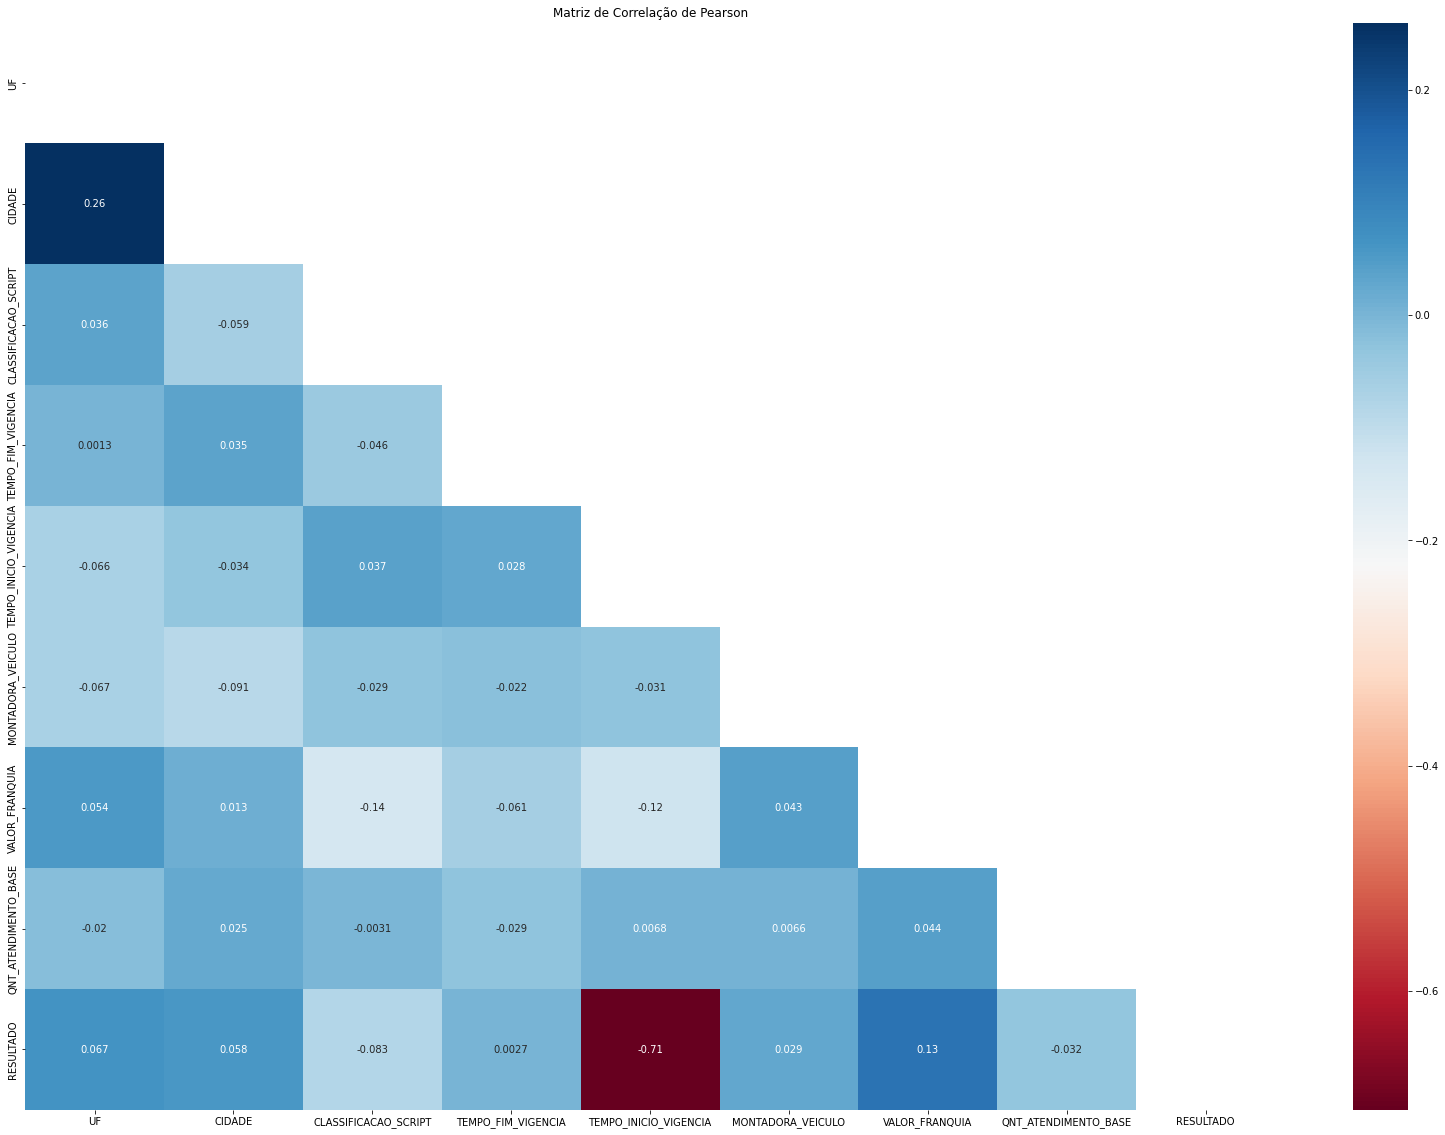

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(28,20))
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap='RdBu',annot=True)
sns.set(style='white')

plt.title('Matriz de Correlação de Pearson')
plt.show()

In [ ]:
df.RESULTADO.value_counts()

0    517
1    462
Name: RESULTADO, dtype: int64

In [ ]:
def acuracia(modelo, X_train, X_test, y_train, y_test):
    print('Acuracia do modelo {} nos dados de treinamento: {:.2f}'.format(type(modelo).__name__, modelo.score(X_train, y_train)))
    print('Acuracia do modelo {} nos dados de teste: {:.2f}\n'.format(type(modelo).__name__, modelo.score(X_test, y_test)))

def matrix_confusao(y_test, y_pred):
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score

    cm = confusion_matrix(y_test, y_pred) 

    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')


def curva_roc(modelo, X_test, y_test, y_pred):
    # roc curve and auc
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    probs = modelo.predict_proba(X_test)
    probs = probs[:, 1]

    # calculate AUC
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

In [ ]:
X = df.drop('RESULTADO', 1)  
y = pd.DataFrame(df['RESULTADO'])

<ipython-input-14-30e4af905efd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('RESULTADO', 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)


In [ ]:
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
acuracia(model, X_train, X_test, y_train, y_test)

<ipython-input-17-864f1ce2b9d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Acuracia do modelo RandomForestClassifier nos dados de treinamento: 1.00
Acuracia do modelo RandomForestClassifier nos dados de teste: 0.98



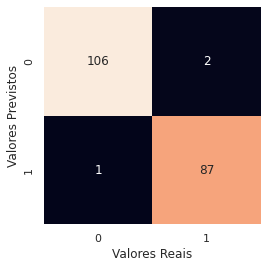

In [ ]:
matrix_confusao(y_test, y_pred)

AUC: 0.984


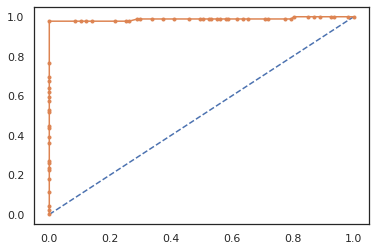

In [ ]:
curva_roc(model, X_test, y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.99      0.98      0.98        89

    accuracy                           0.98       196
   macro avg       0.99      0.98      0.98       196
weighted avg       0.98      0.98      0.98       196



**Teste**

In [ ]:
df = pd.read_excel('SCORE_FRAUDE_TESTE.xlsx')

In [ ]:
# Excluíndo colunas de código

df = df.drop(columns=['VEICULO','FAMILIA_VEICULO'])

In [ ]:
import numpy as np

# Convertendo RESULTADO em binário

df['RESULTADO'] = np.where(df['RESULTADO'].isin(['APROVADO']), 0, 1)

# Converter colunas em categorical

df['UF'] = pd.Categorical(df['UF'])
df['CIDADE'] = pd.Categorical(df['CIDADE'])
df['CLASSIFICACAO_SCRIPT'] = pd.Categorical(df['CLASSIFICACAO_SCRIPT'])

df['MONTADORA_VEICULO'] = pd.Categorical(df['MONTADORA_VEICULO'])

# Converter colunas em numeric
df['TEMPO_FIM_VIGENCIA'] = pd.to_numeric(df['TEMPO_FIM_VIGENCIA'])
df['TEMPO_INICIO_VIGENCIA'] = pd.to_numeric(df['TEMPO_INICIO_VIGENCIA'])
df['QNT_ATENDIMENTO_BASE'] = pd.to_numeric(df['QNT_ATENDIMENTO_BASE'])
df['VALOR_FRANQUIA'] = pd.to_numeric(df['VALOR_FRANQUIA'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RESULTADO              477 non-null    int64   
 1   UF                     477 non-null    category
 2   CIDADE                 477 non-null    category
 3   CLASSIFICACAO_SCRIPT   477 non-null    category
 4   TEMPO_FIM_VIGENCIA     477 non-null    int64   
 5   TEMPO_INICIO_VIGENCIA  477 non-null    int64   
 6   MONTADORA_VEICULO      477 non-null    category
 7   VALOR_FRANQUIA         477 non-null    int64   
 8   QNT_ATENDIMENTO_BASE   477 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 28.7 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Codificar variáveis categoricas

label_encoder = LabelEncoder().fit(df['UF'])
df['UF'] = label_encoder.transform(df['UF'])

label_encoder = LabelEncoder().fit(df['CIDADE'])
df['CIDADE'] = label_encoder.transform(df['CIDADE'])

label_encoder = LabelEncoder().fit(df['CLASSIFICACAO_SCRIPT'])
df['CLASSIFICACAO_SCRIPT'] = label_encoder.transform(df['CLASSIFICACAO_SCRIPT'])


label_encoder = LabelEncoder().fit(df['MONTADORA_VEICULO'])
df['MONTADORA_VEICULO'] = label_encoder.transform(df['MONTADORA_VEICULO'])

df.head(3)

,RESULTADO,UF,CIDADE,CLASSIFICACAO_SCRIPT,TEMPO_FIM_VIGENCIA,TEMPO_INICIO_VIGENCIA,MONTADORA_VEICULO,VALOR_FRANQUIA,QNT_ATENDIMENTO_BASE
0,1,22,80,9,88,277,5,90,0
1,1,16,134,9,245,120,5,140,1
2,1,22,155,7,181,184,6,230,1


In [ ]:
df_previsao = df.drop(columns=['RESULTADO'])


In [ ]:
for index, row in df_previsao.iterrows():

    resultado = model.predict_proba(df_previsao[df_previsao.index == index])

    print(resultado[0][0])

0.799
0.746
0.746
0.77
0.784
0.833
0.746
0.746
0.864
0.766
0.746
0.822
0.799
0.77
0.746
0.746
0.746
0.784
0.799
0.822
0.746
0.746
0.808
0.746
0.746
0.77
0.766
0.746
0.77
0.746
0.746
0.822
0.734
0.77
0.734
0.746
0.746
0.77
0.833
0.746
0.77
0.746
0.77
0.822
0.77
0.746
0.799
0.746
0.77
0.746
0.77
0.746
0.746
0.772
0.77
0.772
0.746
0.796
0.833
0.746
0.821
0.799
0.799
0.77
0.799
0.746
0.77
0.746
0.746
0.799
0.77
0.746
0.77
0.746
0.77
0.799
0.746
0.77
0.77
0.77
0.799
0.799
0.77
0.799
0.746
0.766
0.746
0.746
0.781
0.873
0.746
0.746
0.746
0.873
0.746
0.746
0.822
0.77
0.746
0.77
0.784
0.746
0.746
0.746
0.833
0.77
0.746
0.799
0.77
0.746
0.77
0.77
0.746
0.746
0.821
0.746
0.746
0.799
0.746
0.833
0.746
0.746
0.746
0.821
0.746
0.772
0.821
0.746
0.746
0.77
0.799
0.746
0.746
0.746
0.746
0.781
0.746
0.746
0.77
0.77
0.746
0.77
0.834
0.799
0.746
0.784
0.833
0.799
0.834
0.746
0.784
0.77
0.77
0.77
0.746
0.746
0.77
0.833
0.821
0.77
0.799
0.799
0.77
0.77
0.77
0.77
0.746
0.77
0.77
0.77
0.746
0.799
0.77
0.77
0